In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [3]:
worksheet = gc.open('Student_Tables').sheet1

In [4]:
rows = worksheet.get_all_values()

In [5]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Table':'int'})
df = df.astype({'Scores':'int'})
df.head()

,Table,Scores
0,1,9
1,2,18
2,3,27
3,4,36
4,5,45


In [6]:
x=df[['Table']].values
y=df[['Scores']].values

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [9]:
x_t=scaler.transform(x_train)
x_t

array([[0.375 ],
       [0.8125],
       [0.25  ],
       [0.125 ],
       [0.3125],
       [0.875 ],
       [0.5625],
       [0.4375],
       [1.    ],
       [0.6875],
       [0.1875],
       [0.    ],
       [0.9375],
       [0.75  ]])

In [13]:
ai=Sequential([
    Dense(8,activation='relu'),
    Dense(13,activation='relu'),
    Dense(1)
])

In [14]:
ai.compile(optimizer='rmsprop',loss='mse')

In [15]:
ai.fit(x_t,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 779ms/step - loss: 9112.8467
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 9108.3721
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 9105.1006
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 9102.3496
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 9099.8994
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 9097.6455
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 9095.5303
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 9093.5215
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 9091.6025
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 9089.7432
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 9087.9355
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 9086.1729
Epoch 13/20

In [16]:
ai.fit(x_t,y_train,epochs=700)

Epoch 1/700
1/1 [==============================] - 0s 14ms/step - loss: 92.7447
Epoch 2/700
1/1 [==============================] - 0s 14ms/step - loss: 92.2616
Epoch 3/700
1/1 [==============================] - 0s 11ms/step - loss: 91.7795
Epoch 4/700
1/1 [==============================] - 0s 11ms/step - loss: 91.2985
Epoch 5/700
1/1 [==============================] - 0s 13ms/step - loss: 90.8186
Epoch 6/700
1/1 [==============================] - 0s 13ms/step - loss: 90.3399
Epoch 7/700
1/1 [==============================] - 0s 9ms/step - loss: 89.8623
Epoch 8/700
1/1 [==============================] - 0s 9ms/step - loss: 89.3857
Epoch 9/700
1/1 [==============================] - 0s 9ms/step - loss: 88.9103
Epoch 10/700
1/1 [==============================] - 0s 10ms/step - loss: 88.4360
Epoch 11/700
1/1 [==============================] - 0s 10ms/step - loss: 87.9628
Epoch 12/700
1/1 [==============================] - 0s 10ms/step - loss: 87.4907
Epoch 13/700
1/1 [======================

In [17]:
loss_df=pd.DataFrame(ai.history.history)

<AxesSubplot:>

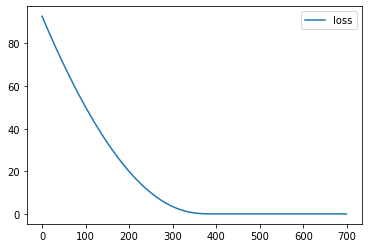

In [18]:
loss_df.plot()

In [19]:
x_t2=scaler.transform(x_test)

In [20]:
ai.evaluate(x_t2,y_test)

1/1 [==============================] - 0s 163ms/step - loss: 0.0155


0.015539380721747875

In [21]:
z=[[7]]

In [22]:
z_1=scaler.transform(z)

In [23]:
ai.predict(z_1)

1/1 [==============================] - 0s 130ms/step


array([[62.925957]], dtype=float32)